# Characteristics of Businesses

In [11]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)

### Step #1
Requested an individual API key from the website in order to request the data and URLs. Next, I requested individual columns I believed would be useful in my investigation on both a state level and a national US level. I stored the requested data in two json files with their respective information.

In [12]:
apikey = 'cabb73d5e421501e2701babc11c42a974c0e6e99'

# Get data for both state and US

business_nation = requests.get(f'http://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,BUSCHAR,BUSCHAR_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=us:*&key={apikey}')
print(business_nation)
business_state = requests.get(f'http://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,BUSCHAR,BUSCHAR_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=state:*&key={apikey}')
print(business_state)

business_nation = business_nation.json()
business_nation = json.dumps(business_nation)

business_state = business_state.json()
business_state = json.dumps(business_state)

<Response [200]>
<Response [200]>


### Step #2
Read in both the state and US json files to further clean and organize. Began the cleaning process by dropping unwanted columns that my group deemed unnecessary for the research. We decided to focus on the industries on each level and the characteristics that describe them.

In [13]:
# Find data on the US level
nation = pd.read_json(business_nation)

headers = nation.iloc[0]
bus = pd.DataFrame(nation.values[1:], columns=headers)

# Remove unwanted columns
bus = bus.drop(columns =['GEO_ID', 'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'BUSCHAR', 'us'])
bus

,NAME,NAICS2017_LABEL,BUSCHAR_LABEL,SEX_LABEL,ETH_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,United States,Total for all sectors,All firms,Total,Total,5722142,38405539368,128196406,6937240308
1,United States,Total for all sectors,1 person,Total,Total,1628501,2270021185,10991334,454218390
2,United States,Total for all sectors,2 to 4 people,Total,Total,1024784,2462681905,11240900,478308387
3,United States,Total for all sectors,5 to 10 people,Total,Total,49436,413777541,1423837,75150602
4,United States,Total for all sectors,11 or more people,Total,Total,31846,6023549720,13448854,986906070
...,...,...,...,...,...,...,...,...,...
4298,United States,Industries not classified,2 to 4 people,Equally male/female,Hispanic,0,0,0,0
4299,United States,Industries not classified,Total reporting,Equally male/female,Hispanic,0,0,0,0
4300,United States,Industries not classified,All firms,Total,Equally Hispanic/non-Hispanic,0,0,0,0
4301,United States,Industries not classified,2 to 4 people,Total,Equally Hispanic/non-Hispanic,0,0,0,0


In [14]:
#find data on the state level
state = pd.read_json(business_state)

headers = state.iloc[0]
bstate = pd.DataFrame(state.values[1:], columns=headers)

#remove unwanted columns
bstate = bstate.drop(columns =['GEO_ID', 'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'BUSCHAR', 'state'])
bstate

,NAME,NAICS2017_LABEL,BUSCHAR_LABEL,SEX_LABEL,ETH_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,Mississippi,Total for all sectors,All firms,Total,Total,40856,0,920447,34137231
1,Mississippi,Total for all sectors,1 person,Total,Total,10704,0,80964,2835519
2,Mississippi,Total for all sectors,2 to 4 people,Total,Total,5956,0,59086,2031186
3,Mississippi,Total for all sectors,5 to 10 people,Total,Total,360,0,13497,618245
4,Mississippi,Total for all sectors,11 or more people,Total,Total,604,0,106361,4807141
...,...,...,...,...,...,...,...,...,...
403,Minnesota,Total for all sectors,5 to 10 people,Total,Total,1286,0,25264,1679605
404,Minnesota,Total for all sectors,11 or more people,Total,Total,1475,0,327504,23461108
405,Minnesota,Total for all sectors,Unknown number of owners,Total,Total,1095,0,390188,28138080
406,Minnesota,Total for all sectors,Total reporting,Total,Total,61423,0,1183664,71702040


### Step #3
Renamed columns from both tables in order to read the data better for interpretation.

In [15]:
# rename column names to make it easier to read
bus.rename(columns={'NAME': 'Country',
                    'NAICS2017_LABEL':'Industry',
                    'BUSCHAR_LABEL': 'BusinessCharacteristic',
                    'SEX_LABEL':'Sex',
                    'ETH_GROUP_LABEL':'Ethnicity',
                    'FIRMPDEMP':'EmployerFirms',
                    'RCPPDEMP':'SalesRevenue',
                    'EMP':'Employees',
                    'PAYANN':'Payroll'}, inplace=True)

bus.head()

,Country,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,United States,Total for all sectors,All firms,Total,Total,5722142,38405539368,128196406,6937240308
1,United States,Total for all sectors,1 person,Total,Total,1628501,2270021185,10991334,454218390
2,United States,Total for all sectors,2 to 4 people,Total,Total,1024784,2462681905,11240900,478308387
3,United States,Total for all sectors,5 to 10 people,Total,Total,49436,413777541,1423837,75150602
4,United States,Total for all sectors,11 or more people,Total,Total,31846,6023549720,13448854,986906070


In [16]:
# rename column names to make it easier to read
bstate.rename(columns={'NAME':'State',
                    'NAICS2017_LABEL':'Industry',
                    'BUSCHAR_LABEL': 'BusinessCharacteristic',
                    'SEX_LABEL':'Sex',
                    'ETH_GROUP_LABEL':'Ethnicity',
                    'FIRMPDEMP':'EmployerFirms',
                    'RCPPDEMP':'SalesRevenue',
                    'EMP':'Employees',
                    'PAYANN':'Payroll'}, inplace=True)

bstate.head()

,State,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,Mississippi,Total for all sectors,All firms,Total,Total,40856,0,920447,34137231
1,Mississippi,Total for all sectors,1 person,Total,Total,10704,0,80964,2835519
2,Mississippi,Total for all sectors,2 to 4 people,Total,Total,5956,0,59086,2031186
3,Mississippi,Total for all sectors,5 to 10 people,Total,Total,360,0,13497,618245
4,Mississippi,Total for all sectors,11 or more people,Total,Total,604,0,106361,4807141


### Step #4
Changed the data types of several columns from objects to floats for readability and in order to aggregate the columns later for visualizations.

In [17]:
# Change some objects into numeric data that can be calculated
columns_float = ['EmployerFirms', 'SalesRevenue', 'Employees', 'Payroll']

for column in columns_float:
    bus[column]=bus[column].astype('float')

bus.head(50)

,Country,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,United States,Total for all sectors,All firms,Total,Total,5722142.0,3.840554e+10,128196406.0,6.937240e+09
1,United States,Total for all sectors,1 person,Total,Total,1628501.0,2.270021e+09,10991334.0,4.542184e+08
2,United States,Total for all sectors,2 to 4 people,Total,Total,1024784.0,2.462682e+09,11240900.0,4.783084e+08
3,United States,Total for all sectors,5 to 10 people,Total,Total,49436.0,4.137775e+08,1423837.0,7.515060e+07
4,United States,Total for all sectors,11 or more people,Total,Total,31846.0,6.023550e+09,13448854.0,9.869061e+08
5,United States,Total for all sectors,Unknown number of owners,Total,Total,21585.0,7.482372e+09,17527385.0,1.199174e+09
6,United States,Total for all sectors,Total reporting,Total,Total,2756150.0,1.865240e+10,54632311.0,3.193758e+09
7,United States,Total for all sectors,Item not reported,Total,Total,127395.0,2.951022e+09,7714221.0,4.614945e+08
8,United States,Total for all sectors,All firms,Female,Total,1141410.0,1.776835e+09,10149257.0,3.880852e+08
9,United States,Total for all sectors,1 person,Female,Total,416190.0,2.823855e+08,2150147.0,7.201726e+07


In [18]:
# Change some objects into numeric data that can be calculated on a state level

columns_float = ['EmployerFirms', 'SalesRevenue', 'Employees', 'Payroll']

for column in columns_float:
    bstate[column]=bstate[column].astype('float')

bstate

,State,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,Mississippi,Total for all sectors,All firms,Total,Total,40856.0,0.0,920447.0,34137231.0
1,Mississippi,Total for all sectors,1 person,Total,Total,10704.0,0.0,80964.0,2835519.0
2,Mississippi,Total for all sectors,2 to 4 people,Total,Total,5956.0,0.0,59086.0,2031186.0
3,Mississippi,Total for all sectors,5 to 10 people,Total,Total,360.0,0.0,13497.0,618245.0
4,Mississippi,Total for all sectors,11 or more people,Total,Total,604.0,0.0,106361.0,4807141.0
...,...,...,...,...,...,...,...,...,...
403,Minnesota,Total for all sectors,5 to 10 people,Total,Total,1286.0,0.0,25264.0,1679605.0
404,Minnesota,Total for all sectors,11 or more people,Total,Total,1475.0,0.0,327504.0,23461108.0
405,Minnesota,Total for all sectors,Unknown number of owners,Total,Total,1095.0,0.0,390188.0,28138080.0
406,Minnesota,Total for all sectors,Total reporting,Total,Total,61423.0,0.0,1183664.0,71702040.0


### Step #5
Created tables to individually work from when creating visualizaitons. Tables that were created were ones for industries, business characteristics, and employee payrolls based on sex.

In [19]:
# table to calculate number of employees and firms in the US per industry
industry = bus[['Industry', 'Employees', 'EmployerFirms']]

# leave out total for industries
industry = industry[(industry['Industry'] !='Total for all sectors')]

# group by industry type and the number of emplyees/firms
industry = industry.groupby(['Industry'], as_index = False)['Employees', 'EmployerFirms'].sum()

#Sort by the number of employees for each industry
industry.sort_values(by ='Employees', ascending = False, inplace = True)

industry.head(20)

C:\Users\cheyp\AppData\Local\Temp\ipykernel_11080\3176164141.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  industry = industry.groupby(['Industry'], as_index = False)['Employees', 'EmployerFirms'].sum()


,Industry,Employees,EmployerFirms
0,Accommodation and food services,134697571.0,6733782.0
7,Health care and social assistance,112694050.0,8503018.0
16,Retail trade,98969057.0,8486970.0
1,Administrative and support and waste managemen...,84757668.0,4744003.0
4,Construction,81062707.0,10127748.0
14,"Professional, scientific, and technical services",78225356.0,12127831.0
11,Manufacturing,76654930.0,3249778.0
19,Wholesale trade,50661504.0,4079581.0
13,Other services (except public administration),31939012.0,5410230.0
6,Finance and insurance,31097753.0,3285003.0


In [20]:
# table to calculate total number of employers in all industries per business characteristic
buschar = bus[['BusinessCharacteristic', 'Industry', 'EmployerFirms']]

# Only need the total for industries
buschar = buschar[(buschar['Industry'] =='Total for all sectors')]

# Filter out the unnecessary values
buschar = buschar[(buschar['BusinessCharacteristic'] != 'All firms') & (buschar['BusinessCharacteristic'] != 'Total reporting') & (buschar['BusinessCharacteristic'] != 'Item not reported')]

# group by both the business and industry type and get the sum of firms for each characteristic
buschar = buschar.groupby(['BusinessCharacteristic', 'Industry'], as_index = False)['EmployerFirms'].sum()

# sort by the number of employers to see which business types have the most employers
buschar.sort_values(by='EmployerFirms', ascending = False, inplace = True)

# renamed the columns to show further detail
buschar.rename(columns={'EmployerFirms': 'Total Employers',
                        'BusinessCharacteristic' : 'Number of Owners'}, inplace=True)

buschar.head(20)

,Number of Owners,Industry,Total Employers
0,1 person,Total for all sectors,11396114.0
2,2 to 4 people,Total for all sectors,7144930.0
3,5 to 10 people,Total for all sectors,336087.0
1,11 or more people,Total for all sectors,92980.0
4,Unknown number of owners,Total for all sectors,88677.0


In [21]:
# table to see the number of employees and their total payrolls based on sex
payroll = bus[['Industry','Sex','Employees','Payroll']]

# Excluded the total industry value as it greatly skews the data for visualizations.
payroll = payroll[(payroll['Industry'] !='Total for all sectors')]

# Filtered out the data so that it would only show employees that are either male or female.
payroll = payroll[(payroll['Sex'] =='Female')|(payroll['Sex'] =='Male')]

# Grouped the data based on industry and sex
payroll = payroll.groupby(['Industry','Sex'], as_index = False).sum()

payroll.head(70)

,Industry,Sex,Employees,Payroll
0,Accommodation and food services,Female,7984887.0,1.455353e+08
1,Accommodation and food services,Male,36704039.0,6.998373e+08
2,Administrative and support and waste managemen...,Female,5983489.0,2.043906e+08
3,Administrative and support and waste managemen...,Male,22553209.0,8.166381e+08
4,"Agriculture, forestry, fishing and hunting",Female,96766.0,2.192090e+06
5,"Agriculture, forestry, fishing and hunting",Male,2690129.0,3.561906e+07
6,"Arts, entertainment, and recreation",Female,734371.0,2.971785e+07
7,"Arts, entertainment, and recreation",Male,3788818.0,1.423660e+08
8,Construction,Female,3553394.0,2.069642e+08
9,Construction,Male,26256504.0,1.512943e+09


## Visualizations

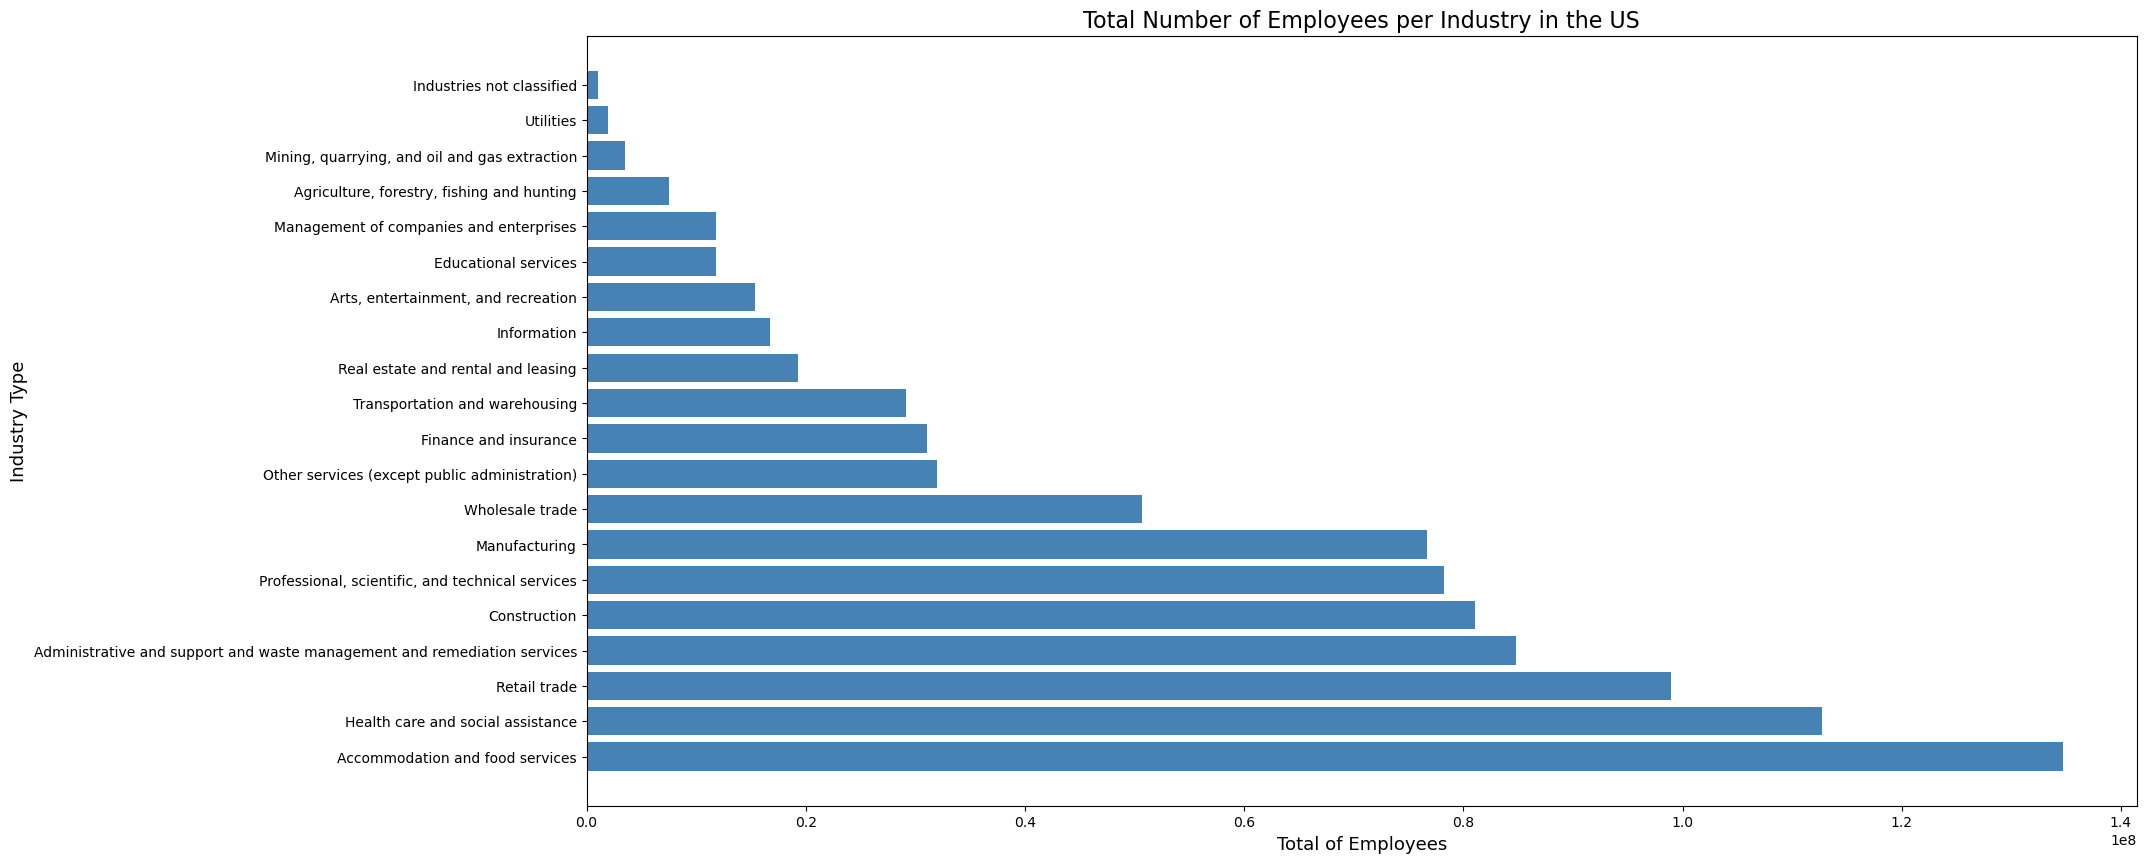

In [22]:
plt.figure(figsize = (20, 10))

plt.barh(y = industry['Industry'], width = industry['Employees'], color = 'steelblue');

plt.title('Total Number of Employees per Industry in the US', size = 16)
plt.ylabel('Industry Type', size = 13)
plt.xlabel('Total of Employees', size = 13);

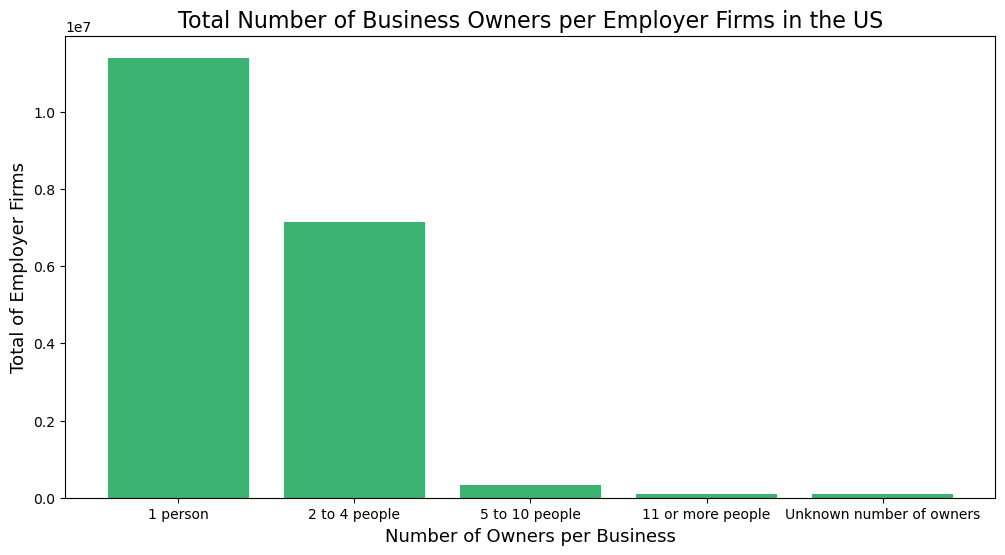

In [23]:
plt.figure(figsize = (12, 6))

plt.bar(x = buschar['Number of Owners'], height = buschar['Total Employers'], color = 'mediumseagreen');

plt.title('Total Number of Business Owners per Employer Firms in the US', size = 16)
plt.xlabel('Number of Owners per Business', size = 13)
plt.ylabel('Total of Employer Firms', size = 13);

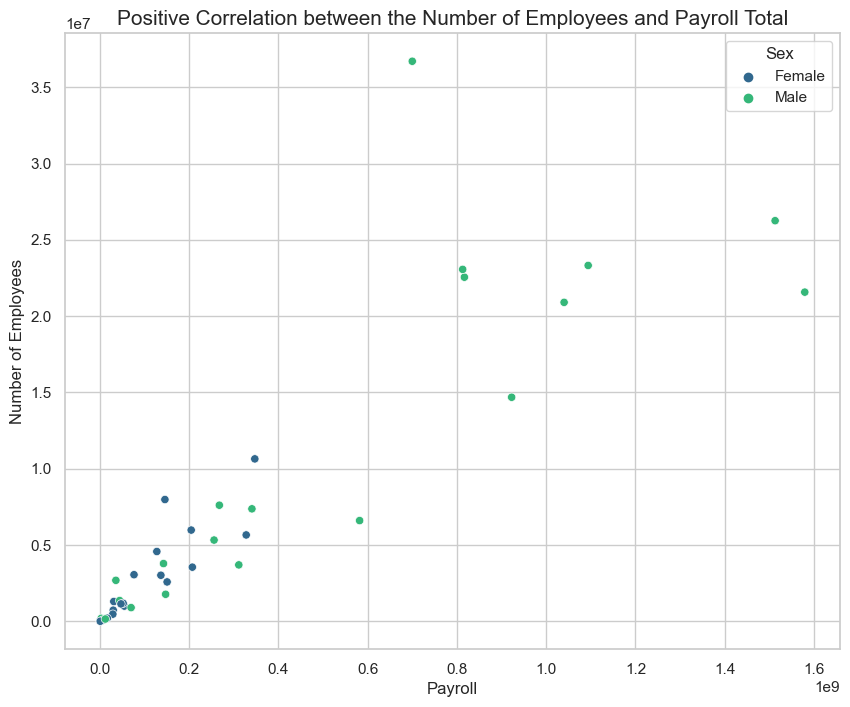

In [26]:
f, ax = plt.subplots(figsize=(10, 8))

sns.set_theme(style = "whitegrid")
sns.scatterplot(data = payroll, x = 'Payroll', y = 'Employees', hue = 'Sex', palette = 'viridis');
ax.set_title('Positive Correlation between the Number of Employees and Payroll Total', size = 15)
ax.set_xlabel('Payroll', size = 12) 
ax.set_ylabel('Number of Employees', size = 12);


C:\Users\cheyp\AppData\Local\Temp\ipykernel_11080\1333570187.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  MFTable['Total'] = MFTable.sum(axis = 1)


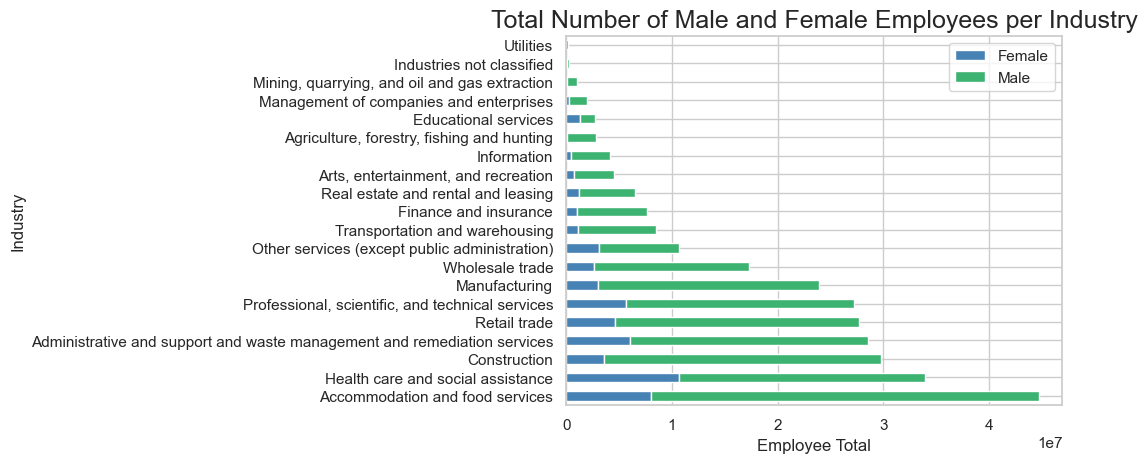

In [25]:

MFTable = pd.pivot_table(payroll, index=['Industry'], columns=['Sex'], values=['Employees'], aggfunc = sum)
MFTable.columns = ['_'.join(str(s).strip() for s in col if s) for col in MFTable.columns]
MFTable = MFTable.rename(columns={'Employees_Female': 'Female',
                                  'Employees_Male' : 'Male'});

MFTable.reset_index(inplace = True)

MFTable['Total'] = MFTable.sum(axis = 1)
MFTable = MFTable.sort_values(by = 'Total', ascending = False);

industry_stacked_bar_vals = MFTable.drop('Total', axis = 1);

sns.set_theme(style = "whitegrid")
industry_stacked_bar_vals.set_index('Industry').plot(kind = 'barh', stacked = True, color = ['steelblue', 'mediumseagreen'])
plt.title('Total Number of Male and Female Employees per Industry', fontsize = 18)
plt.ylabel('Industry', fontsize = 12)
plt.xlabel('Employee Total', fontsize = 12);
